<a href="https://colab.research.google.com/github/GabrielAzpitarte/Machine-learning-projects/blob/main/Musical%20note%20generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation de Fluidsynth et pretty midi

### fluidsynth (synthétiseur virtuel) et pretty_midi (librairie)

In [ ]:
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth

!pip install pretty_midi

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs timidity jackd musescore
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 126 MB of archives.
After this operation, 157 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libinstpatch-1.0-2 amd64 1.1.2-2build1 [238 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 timgm6mb-soundfont all 1.3-3 [5,420 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libfluidsynth2 amd64 2.1.1-2 [

# Récupération des données

In [ ]:
!wget 'https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0-midi.zip'

--2023-04-08 13:22:41--  https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0-midi.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58416533 (56M) [application/octet-stream]
Saving to: ‘maestro-v3.0.0-midi.zip’

maestro-v3.0.0-midi 100%[===================>]  55.71M  17.6MB/s    in 3.7s    

2023-04-08 13:22:45 (15.2 MB/s) - ‘maestro-v3.0.0-midi.zip’ saved [58416533/58416533]



In [ ]:
! unzip *.zip && rm *.zip

Archive:  maestro-v3.0.0-midi.zip
  inflating: maestro-v3.0.0/2004/MIDI-Unprocessed_XP_08_R1_2004_01-02_ORIG_MID--AUDIO_08_R1_2004_01_Track01_wav.midi  
  inflating: maestro-v3.0.0/2004/MIDI-Unprocessed_XP_09_R1_2004_05_ORIG_MID--AUDIO_09_R1_2004_06_Track06_wav.midi  
  inflating: maestro-v3.0.0/2004/MIDI-Unprocessed_XP_14_R1_2004_01-03_ORIG_MID--AUDIO_14_R1_2004_01_Track01_wav.midi  
  inflating: maestro-v3.0.0/2004/MIDI-Unprocessed_XP_01_R1_2004_01-02_ORIG_MID--AUDIO_01_R1_2004_03_Track03_wav.midi  
  inflating: maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_13_01_2004_01-05_ORIG_MID--AUDIO_13_R1_2004_09_Track09_wav.midi  
  inflating: maestro-v3.0.0/2004/MIDI-Unprocessed_XP_18_R1_2004_01-02_ORIG_MID--AUDIO_18_R1_2004_03_Track03_wav.midi  
  inflating: maestro-v3.0.0/2004/MIDI-Unprocessed_XP_19_R1_2004_01-02_ORIG_MID--AUDIO_19_R1_2004_01_Track01_wav.midi  
  inflating: maestro-v3.0.0/2004/MIDI-Unprocessed_XP_04_R1_2004_06_ORIG_MID--AUDIO_04_R1_2004_08_Track08_wav.midi  
  inflating: maestr

In [ ]:
from glob import glob

fichiers = glob('/content/maestro-v3.0.0/*/*.midi')
print(len(fichiers))

1276


# Création du lecteur de fichier midi

In [ ]:
from IPython.display import Audio

# Fonction pour afficher l'audio avec limitation des hachures
def display_audio(fichier_midi, tempo=16000, secondes=30):
  musique = fichier_midi.fluidsynth(tempo)
  morceau = musique[:secondes*tempo]
  return Audio(morceau, rate=tempo)


import pretty_midi
fichier = fichiers[0]
midi = pretty_midi.PrettyMIDI(fichier)

display_audio(midi, secondes=10)

# Analyse des données

In [ ]:
# nombre d'instruments
print("nombre d'instrument(s) : ", len(midi.instruments))
# Type d'instrument
instrument = midi.instruments[0]
nom_instrument = pretty_midi.program_to_instrument_name(instrument.program)
print(nom_instrument)

nombre d'instrument(s) :  1
Acoustic Grand Piano


# Transformation du morceau en un tableau pandas

### Le but est de transformer notre partition en dataframe pandas, pour manipuler les infos envoyées à notre IA

In [ ]:
# On récupère tout ce qu'on peut
import pandas as pd

def midi2pandas(midi):
  instrument = midi.instruments[0]
  df_notes = {'start':[], 'end':[], 'pitch':[], 'velocity':[], 'duration':[]}

  # Boucler toutes les valeurs
  for note in instrument.notes:
    df_notes['duration'].append(note.duration)
    df_notes['start'].append(note.start)
    df_notes['end'].append(note.end)
    df_notes['pitch'].append(note.pitch)
    df_notes['velocity'].append(note.velocity)

  return pd.DataFrame(df_notes)

In [ ]:
df = midi2pandas(midi)
df.head(10)

,start,end,pitch,velocity,duration
0,1.035417,1.102083,54,47,0.066667
1,1.020833,1.123958,66,72,0.103125
2,1.387500,1.450000,47,61,0.062500
3,1.371875,1.450000,62,75,0.078125
4,1.379167,1.450000,66,73,0.070833
5,1.378125,1.457292,54,67,0.079167
6,1.383333,1.473958,59,68,0.090625
7,1.364583,1.477083,74,86,0.112500
8,1.697917,1.728125,59,58,0.030208
9,1.705208,1.732292,54,50,0.027083


In [ ]:
# trier la sortie des notes dans l'ordre
df_trie = df.sort_values(by=['start'])
df_trie.head(10)

,start,end,pitch,velocity,duration
1,1.020833,1.123958,66,72,0.103125
0,1.035417,1.102083,54,47,0.066667
7,1.364583,1.477083,74,86,0.112500
3,1.371875,1.450000,62,75,0.078125
5,1.378125,1.457292,54,67,0.079167
4,1.379167,1.450000,66,73,0.070833
6,1.383333,1.473958,59,68,0.090625
2,1.387500,1.450000,47,61,0.062500
13,1.694792,1.744792,74,80,0.050000
8,1.697917,1.728125,59,58,0.030208


# Les Steps

Pour entrainer l'IA, on va utiliser le temps entre une note et la suivante. Car des notes peuvent se chevaucher

In [ ]:
# Exemple de step entre la note 0 et 1
# Utiliser la propriété .at[] qui permet d'accéder a une valeur unique dans un tableau pandas
step_test  = df_trie.at[1, 'start'] - df_trie.at[0, 'start']
print(step_test)

-0.014583333333333393


### Comment faire ça sur toutes les lignes ?

In [ ]:
# Créer une nouvelle colonne "step" qu'on initialise
df_trie['step'] = ''

# Variable mémorisant la valeur du dernier start
prev_start = 0

# .iterrows() va permettre de renvoyer une série
for i, note in df_trie.iterrows():
  # On calcule l'écart
  step = note['start'] - prev_start
  # On remplace la valeur du step à la position actuelle
  df_trie.at[i, 'step'] = step
  # On met à jour le prev_start pour que la boucle reprenne à partir de là
  prev_start = note['start']

# on affiche le résultat
df_trie.head(10)

,start,end,pitch,velocity,duration,step
1,1.020833,1.123958,66,72,0.103125,1.020833
0,1.035417,1.102083,54,47,0.066667,0.014583
7,1.364583,1.477083,74,86,0.112500,0.329167
3,1.371875,1.450000,62,75,0.078125,0.007292
5,1.378125,1.457292,54,67,0.079167,0.00625
4,1.379167,1.450000,66,73,0.070833,0.001042
6,1.383333,1.473958,59,68,0.090625,0.004167
2,1.387500,1.450000,47,61,0.062500,0.004167
13,1.694792,1.744792,74,80,0.050000,0.307292
8,1.697917,1.728125,59,58,0.030208,0.003125


On a besoin que nos steps soient de type "float" (nombre à virgule)

In [ ]:
# Vérification des types
df_trie.dtypes

start       float64
end         float64
pitch         int64
velocity      int64
duration    float64
step         object
dtype: object

## Comment changer le type d'une donnée

J'aurais pu tout simplement typer ma création de colonne
df_trie['step'] = 0.0

In [ ]:
# On voit que le step n'est pas actuellement une valeur numérique
# On le transforme en float
df_trie['step'] = df_trie.step.astype('float64')
df_trie.dtypes

start       float64
end         float64
pitch         int64
velocity      int64
duration    float64
step        float64
dtype: object

# Création d'un rouleau de piano

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def rouleau_piano(data, compteur=None):
  if compteur :
    titre = f"les {compteur} premières notes"
  else :
    titre = "Le morceau entier"
    compteur = len(data['pitch'])

  # On définit la taille de notre graphe
  plt.figure(figsize=(20,4))
  # On créé nos pairs de valeurs X et Y
  # Pour la durée on va du point de départ au point d'arrivée
  x = np.stack([data['start'],data['end']])
  # Pour les notes on va de pitch en pitch
  y = np.stack([data['pitch'],data['pitch']])
  # On créé notre tracé
  plt.plot(x[:compteur,:compteur],y[:compteur,:compteur],color="b",marker=".")
  # On donne des noms aux axes et au rouleau
  plt.xlabel('Durée')
  plt.ylabel('Pitch')
  plt.title(titre)


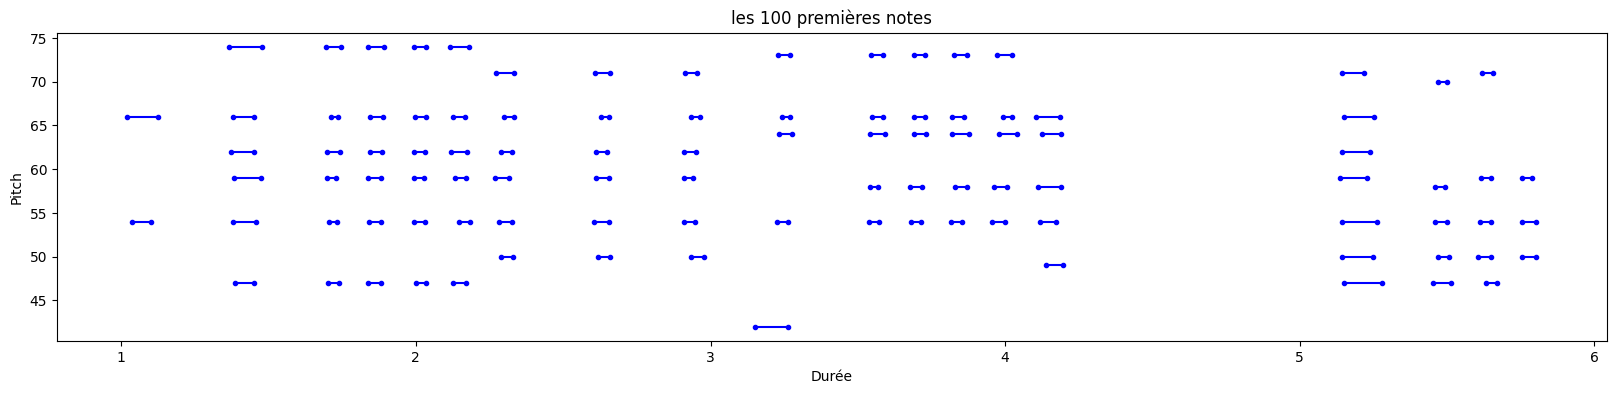

In [ ]:
# On affiche les 100 premières notes dans le rouleau de piano
rouleau_piano(df_trie,100)

# Choix des données et création des séquences

In [ ]:
# Sélection des données
data = df_trie[['pitch']]
# data = df_trie[['pitch','step'.....]]

print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# nos notes sont indépendantes, on va les vectoriser pour prédire correctement
# On va utiliser to_categorical grâce à keras
from keras.utils import to_categorical

# Quelques notions de manipulations pour bien comprendre

# transformer les entrées en tableau, et le stocker dans une variable
# Grace à numpy et la fonction .asarray()
tableau = np.asarray(data)
# Je printe grace a .shape() pour qu'il me renvoie le nombre de lignes et de colonnes
# Ca me revnoie xxxx de pitchs, sur une colonne
print(tableau.shape)
# Si je printe la premiere note de mon tableau
print(tableau[0])

# Avec to_categorical je peux aller chercher mon tableau comportant les pitchs
# Et lui donner en argument que je le veux en 128 (128 pitchs)
tableau = to_categorical(tableau, 128)
print(tableau.shape)
# Si je printe la 1ere note de mon tableau
print(tableau[0])
# np.argmax() permet de renvoyer la valeur max trouvée
print(np.argmax(tableau))

(2681, 1)
[66]
(2681, 128)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
66


### Créer les séquences

In [ ]:
# Définir la longueur de la séquence (on peut le changer comme on veut)
nb_notes = 50

# On crée notre entrées et sorties
X = []  # entrée
Y = []  # sortie

# On remplit nos tableaux
for i, _ in sorted(data.iterrows()):
  try : # Essayer de récupérer la suite de notes + la suivante
    x = data.iloc[i:i+nb_notes]
    y = data.iloc[i+nb_notes]

    # Ajouter les notes
    X.append(np.asarray(x))
    Y.append(np.asarray(y))

  # S'il n'y a plus de notes a rajouter, on génère une exception et on stoppe la boucle
  except IndexError :
    print(f'{i} notes récupérées')
    break

print(X[0])
print()
print(Y[0])

data.head(6)

2676 notes récupérées
[[66]
 [54]
 [74]
 [62]
 [54]]

[66]


,pitch
1,66
0,54
7,74
3,62
5,54
4,66


### On vectorise nos entrées et sorties

In [ ]:
# On transforme nos notes en tableau numpy
X = np.asarray(X)
Y = np.asarray(Y)

print(X.shape)
print(Y.shape)

# On vectorise avec to_categorical
X = to_categorical(X, 128)
Y = to_categorical(Y, 128)

print(X.shape)
print(Y.shape)

(2676, 5, 1)
(2676, 1)
(2676, 5, 128)
(2676, 128)


# Création du modèle et entrainement

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(LSTM(150, input_shape=(nb_notes, 128), recurrent_dropout=0.15))

model.add(Dense(128, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               167400    
                                                                 
 dense (Dense)               (None, 128)               19328     
                                                                 
Total params: 186,728
Trainable params: 186,728
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimiser = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimiser)

In [ ]:
# On peut lancer l'entrainement
model.fit(X, Y, epochs=15, batch_size=8)

Epoch 1/5
168/168 [==============================] - 14s 21ms/step - loss: 3.3042 - accuracy: 0.1229
Epoch 2/5
168/168 [==============================] - 4s 22ms/step - loss: 2.7500 - accuracy: 0.1876
Epoch 3/5
168/168 [==============================] - 5s 28ms/step - loss: 2.3288 - accuracy: 0.2851
Epoch 4/5
168/168 [==============================] - 3s 20ms/step - loss: 1.9431 - accuracy: 0.4025
Epoch 5/5
168/168 [==============================] - 4s 21ms/step - loss: 1.6073 - accuracy: 0.4951


In [ ]:
# Sauvegarder le modèle
model.save("/content/modele.h5")

# Prédiction d'une note

In [ ]:
# On crée notre suite de nb_notes
# On peut le créer manuellement pour nb_notes=5
mes_notes = [68,78,56,78,72]

# Ou les créer au hasard
import random
mes_notes = [random.randint(0,127) for i in range(nb_notes)]


In [ ]:
# Fonction pour préparer la prédiction de notes et entre dans le réseau de neurones
def predit_note(notes):
  # On transforme en tableau numpy
  sequence = np.asarray(notes)
  # On vectorise nos notes
  sequence = to_categorical(sequence, 128)
  # On le force a avoir la forme de notre entrée
  sequence = np.reshape(sequence, (1,nb_notes,128))
  # On retourne notre prédiction
  # verbose=0 me permettra de suivre l'avancée des prédictions de facon plus lisible
  return model.predict(sequence, verbose=0)


In [ ]:
mes_notes = [random.randint(0,127) for i in range(nb_notes)]

prediction = predit_note(mes_notes)
# On récupère la note la plus probable
reponse = np.argmax(prediction)
print(reponse)

# On l'ajoute a nos notes
mes_notes.append(reponse)
print(mes_notes)

64
[77, 95, 58, 69, 113, 64]


## Création du fichier midi pour écouter notre musique

### Joker : on créé le rouleau de piano

In [ ]:
# Création de la liste de notes
def tableau2notes(tab_notes):
  start = 0
  duree = 0.2
  notes = []
  # Pour chaque note dans mon tableau de notes // calculer sa valeur de départ et ajouter la durée
  for note in tab_notes:
    ma_note = pretty_midi.Note(velocity=50, pitch=note, start=start, end=start+duree)
    notes.append(ma_note)
    start += 0.2
  return notes

In [ ]:
# On crée le fichier midi en choisissant l'instrument
def notes2midi(notes, instrument=1, nom_fichier='ia.midi'):
  # Créer le fichier midi
  pm = pretty_midi.PrettyMIDI()
  # Créer l'instrument
  instrument = pretty_midi.Instrument(instrument)
  # Et je boucle pour chaque note dans ma liste de notes, ajouter l'instrument
  for note in notes:
    instrument.notes.append(note)
  # Ajouter l'instrument à la liste des instruments
  pm.instruments.append(instrument)
  pm.write(nom_fichier)
  return pm

In [ ]:
# Je crée mes notes aléatoires
tableau_notes = [random.randint(0,127) for i in range (nb_notes)]
print(tableau_notes)

# Prédire la note suivante --> on bouclera dessus pour avoir plusieurs notes
prediction = predit_note(tableau_notes)
note = np.argmax(prediction)
tableau_notes.append(note)
print(tableau_notes)

# Création de la liste de notes
notes = tableau2notes(tableau_notes)
# Je créé le fichier midi
pm = notes2midi(notes, 26)
print(notes)

[14, 4, 18, 8, 106]
[14, 4, 18, 8, 106, 90]
[Note(start=0.000000, end=0.200000, pitch=14, velocity=50), Note(start=0.200000, end=0.400000, pitch=4, velocity=50), Note(start=0.400000, end=0.600000, pitch=18, velocity=50), Note(start=0.600000, end=0.800000, pitch=8, velocity=50), Note(start=0.800000, end=1.000000, pitch=106, velocity=50), Note(start=1.000000, end=1.200000, pitch=90, velocity=50)]


In [ ]:
chemin = "/content/ia.midi"
pm = pretty_midi.PrettyMIDI(chemin)
display_audio(pm)

# Prédire plusieurs notes

In [ ]:
from tqdm import tqdm

# Je crée mes notes aléatoires
mes_notes = [random.randint(0,127) for i in range (nb_notes)]
print(mes_notes)

for i in tqdm(range(100)):
  prediction = predit_note(mes_notes[i:i+nb_notes])
  note = np.argmax(prediction)
  mes_notes.append(note)
print(mes_notes)

[47, 9, 6, 27, 46]


100%|██████████| 100/100 [00:05<00:00, 17.24it/s]

[47, 9, 6, 27, 46, 49, 40, 46, 76, 64, 67, 76, 64, 58, 55, 76, 67, 55, 58, 64, 58, 79, 64, 55, 67, 70, 58, 79, 67, 64, 55, 58, 64, 79, 67, 70, 55, 67, 58, 79, 64, 67, 70, 55, 58, 79, 67, 64, 55, 58, 64, 79, 67, 70, 55, 67, 58, 79, 64, 67, 70, 55, 58, 79, 67, 64, 55, 58, 64, 79, 67, 70, 55, 67, 58, 79, 64, 67, 70, 55, 58, 79, 67, 64, 55, 58, 64, 79, 67, 70, 55, 67, 58, 79, 64, 67, 70, 55, 58, 79, 67, 64, 55, 58, 64]


In [ ]:
# On génère les notes
melodie = tableau2notes(mes_notes)
# Créer le fichier midi
morceau = notes2midi(melodie, 26)
# On lit notre morceau
display_audio(morceau)

# Test avec une musique existante

In [ ]:
!wget https://bitmidi.com/uploads/46439.mid

--2023-04-08 13:23:34--  https://bitmidi.com/uploads/46439.mid
Resolving bitmidi.com (bitmidi.com)... 104.26.8.141, 172.67.72.170, 104.26.9.141, ...
Connecting to bitmidi.com (bitmidi.com)|104.26.8.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [audio/midi]
Saving to: ‘46439.mid’

46439.mid               [ <=>                ]   7.07K  --.-KB/s    in 0s      

2023-04-08 13:23:34 (97.1 MB/s) - ‘46439.mid’ saved [7243]



In [ ]:
pm = pretty_midi.PrettyMIDI("/content/46439.mid")
instrument = pm.instruments[0]
nom_instrument = pretty_midi.program_to_instrument_name(instrument.program)
print(nom_instrument)

Acoustic Grand Piano


In [ ]:
df = midi2pandas(pm)
df = df.sort_values(by=['start'])
df.head(10)

,start,end,pitch,velocity,duration
0,0.000000,0.3125,36,100,0.312500
2,0.000000,0.9375,52,100,0.937500
4,0.078125,1.2500,55,100,1.171875
5,0.156250,1.2500,60,100,1.093750
1,0.312500,0.6250,43,100,0.312500
3,0.625000,0.9375,52,100,0.312500
6,0.937500,1.2500,48,100,0.312500
9,1.250000,1.8750,62,100,0.625000
10,1.250000,1.8750,50,100,0.625000
7,1.250000,1.8750,55,100,0.625000


In [ ]:
data = df[['pitch']].iloc[:50]

In [ ]:
notes = []
for i, note in sorted(data.iterrows()):
  notes.append(note['pitch'])
print(notes)

[36, 43, 52, 52, 55, 60, 48, 55, 60, 62, 50, 55, 64, 60, 60, 64, 45, 52, 57, 71, 52, 60, 60, 59, 64, 69, 57, 36, 43, 48, 52, 55, 60, 43, 55, 60, 62, 50, 55, 60, 64, 48, 44, 67, 48, 56, 56, 60, 65, 48]


In [ ]:
from tqdm import tqdm

# Je crée mes notes aléatoires
mes_notes = [random.randint(0,127) for i in range (nb_notes)]
print(mes_notes)

for i in tqdm(range(100)):
  prediction = predit_note(mes_notes[len(mes_notes)-nb_notes:len(mes_notes)])
  note = np.argmax(prediction)
  mes_notes.append(note)
print(mes_notes)

[93, 62, 58, 90, 8]


100%|██████████| 100/100 [00:05<00:00, 19.03it/s]

[93, 62, 58, 90, 8, 78, 62, 59, 90, 78, 90, 78, 90, 78, 67, 67, 88, 78, 76, 71, 74, 66, 62, 54, 66, 57, 54, 66, 62, 54, 62, 59, 54, 66, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47, 74, 62, 59, 47, 47]


In [ ]:
# On génère les notes
melodie = tableau2notes(mes_notes)
# Créer le fichier midi
morceau = notes2midi(melodie, 26)
# On lit notre morceau
display_audio(morceau)